In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas

In [2]:
import nltk
from collections import Counter

In [3]:
%matplotlib inline

In [4]:
sns.set(font_scale=1.5)

In [6]:
loans = pd.read_csv("./kiva_loans.csv")

In [9]:
loans[loans.country == 'Bangladesh']

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date


In [6]:
loans.keys()

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [7]:
loans.funded_amount.describe()

count    671205.000000
mean        785.995061
std        1130.398941
min           0.000000
25%         250.000000
50%         450.000000
75%         900.000000
max      100000.000000
Name: funded_amount, dtype: float64

(array([2.88928692e-04, 9.62137421e-06, 1.44269200e-06, 2.05651788e-08,
        1.11767276e-08, 7.15310568e-09, 0.00000000e+00, 7.60017479e-09,
        7.15310568e-09, 8.94138210e-10, 3.12948374e-09, 2.68241463e-09,
        8.94138210e-10, 0.00000000e+00, 2.05651788e-08, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.47069105e-10]),
 array([2.50000e+01, 3.35750e+03, 6.69000e+03, 1.00225e+04, 1.33550e+04,
        1.66875e+04, 2.00200e+04, 2.33525e+04, 2.66850e+04, 3.00175e+04,
        3.33500e+04, 3.66825e+04, 4.00150e+04, 4.33475e+04, 4.66800e+04,
        5.00125e+04, 5.33450e+04, 5.66775e+04, 6.00100e+04, 6.33425e+04,
        6.66750e+04, 7.00075e+04, 7.33400e+04, 7.66725e+04, 8.00050e+04,
        8.33375e+04, 8.66700e+04, 9.00025e+04, 9.33350e+04, 9.66675e+04,
        1.00000e

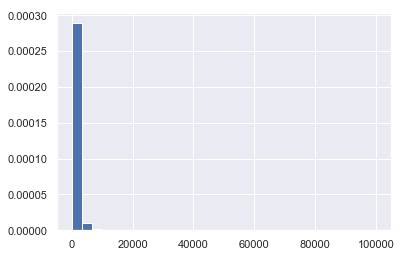

In [13]:
plt.hist(loans.loan_amount, bins=30, normed=True)

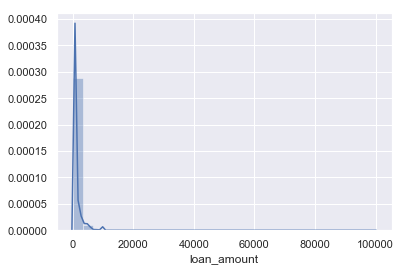

In [11]:
ax = sns.distplot(loans.loan_amount, bins=30)
# ax.set_yscale('log')

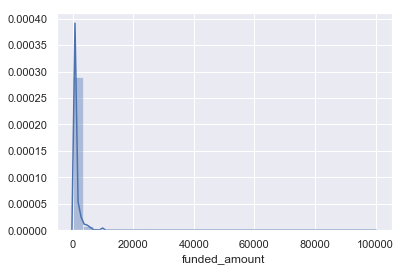

In [10]:
sns.distplot(loans.funded_amount, bins=30)

In [7]:
loans['funded_ratio'] = loans.funded_amount / loans.loan_amount

In [13]:
loans.funded_ratio.describe()

count    671205.000000
mean          0.960563
std           0.158867
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.133333
Name: funded_ratio, dtype: float64

In [47]:
loans.activity.unique().size

163

In [13]:
loans.groupby('activity').size().sort_values(ascending=False)[:10]

activity
Farming                      72955
General Store                64729
Personal Housing Expenses    32448
Food Production/Sales        28106
Agriculture                  27023
Pigs                         26624
Retail                       24771
Clothing Sales               22339
Home Appliances              20267
Higher education costs       19742
dtype: int64

In [14]:
top_ten_activities = ["Farming",
    "General Store",
    "Personal Housing Expenses",
    "Food Production/Sales",
    "Agriculture",
    "Pigs",
    "Retail",
    "Clothing Sales",
    "Home Appliances",
    "Higher education costs"]

In [15]:
popular_activities = loans[loans['activity'].isin(top_ten_activities)]

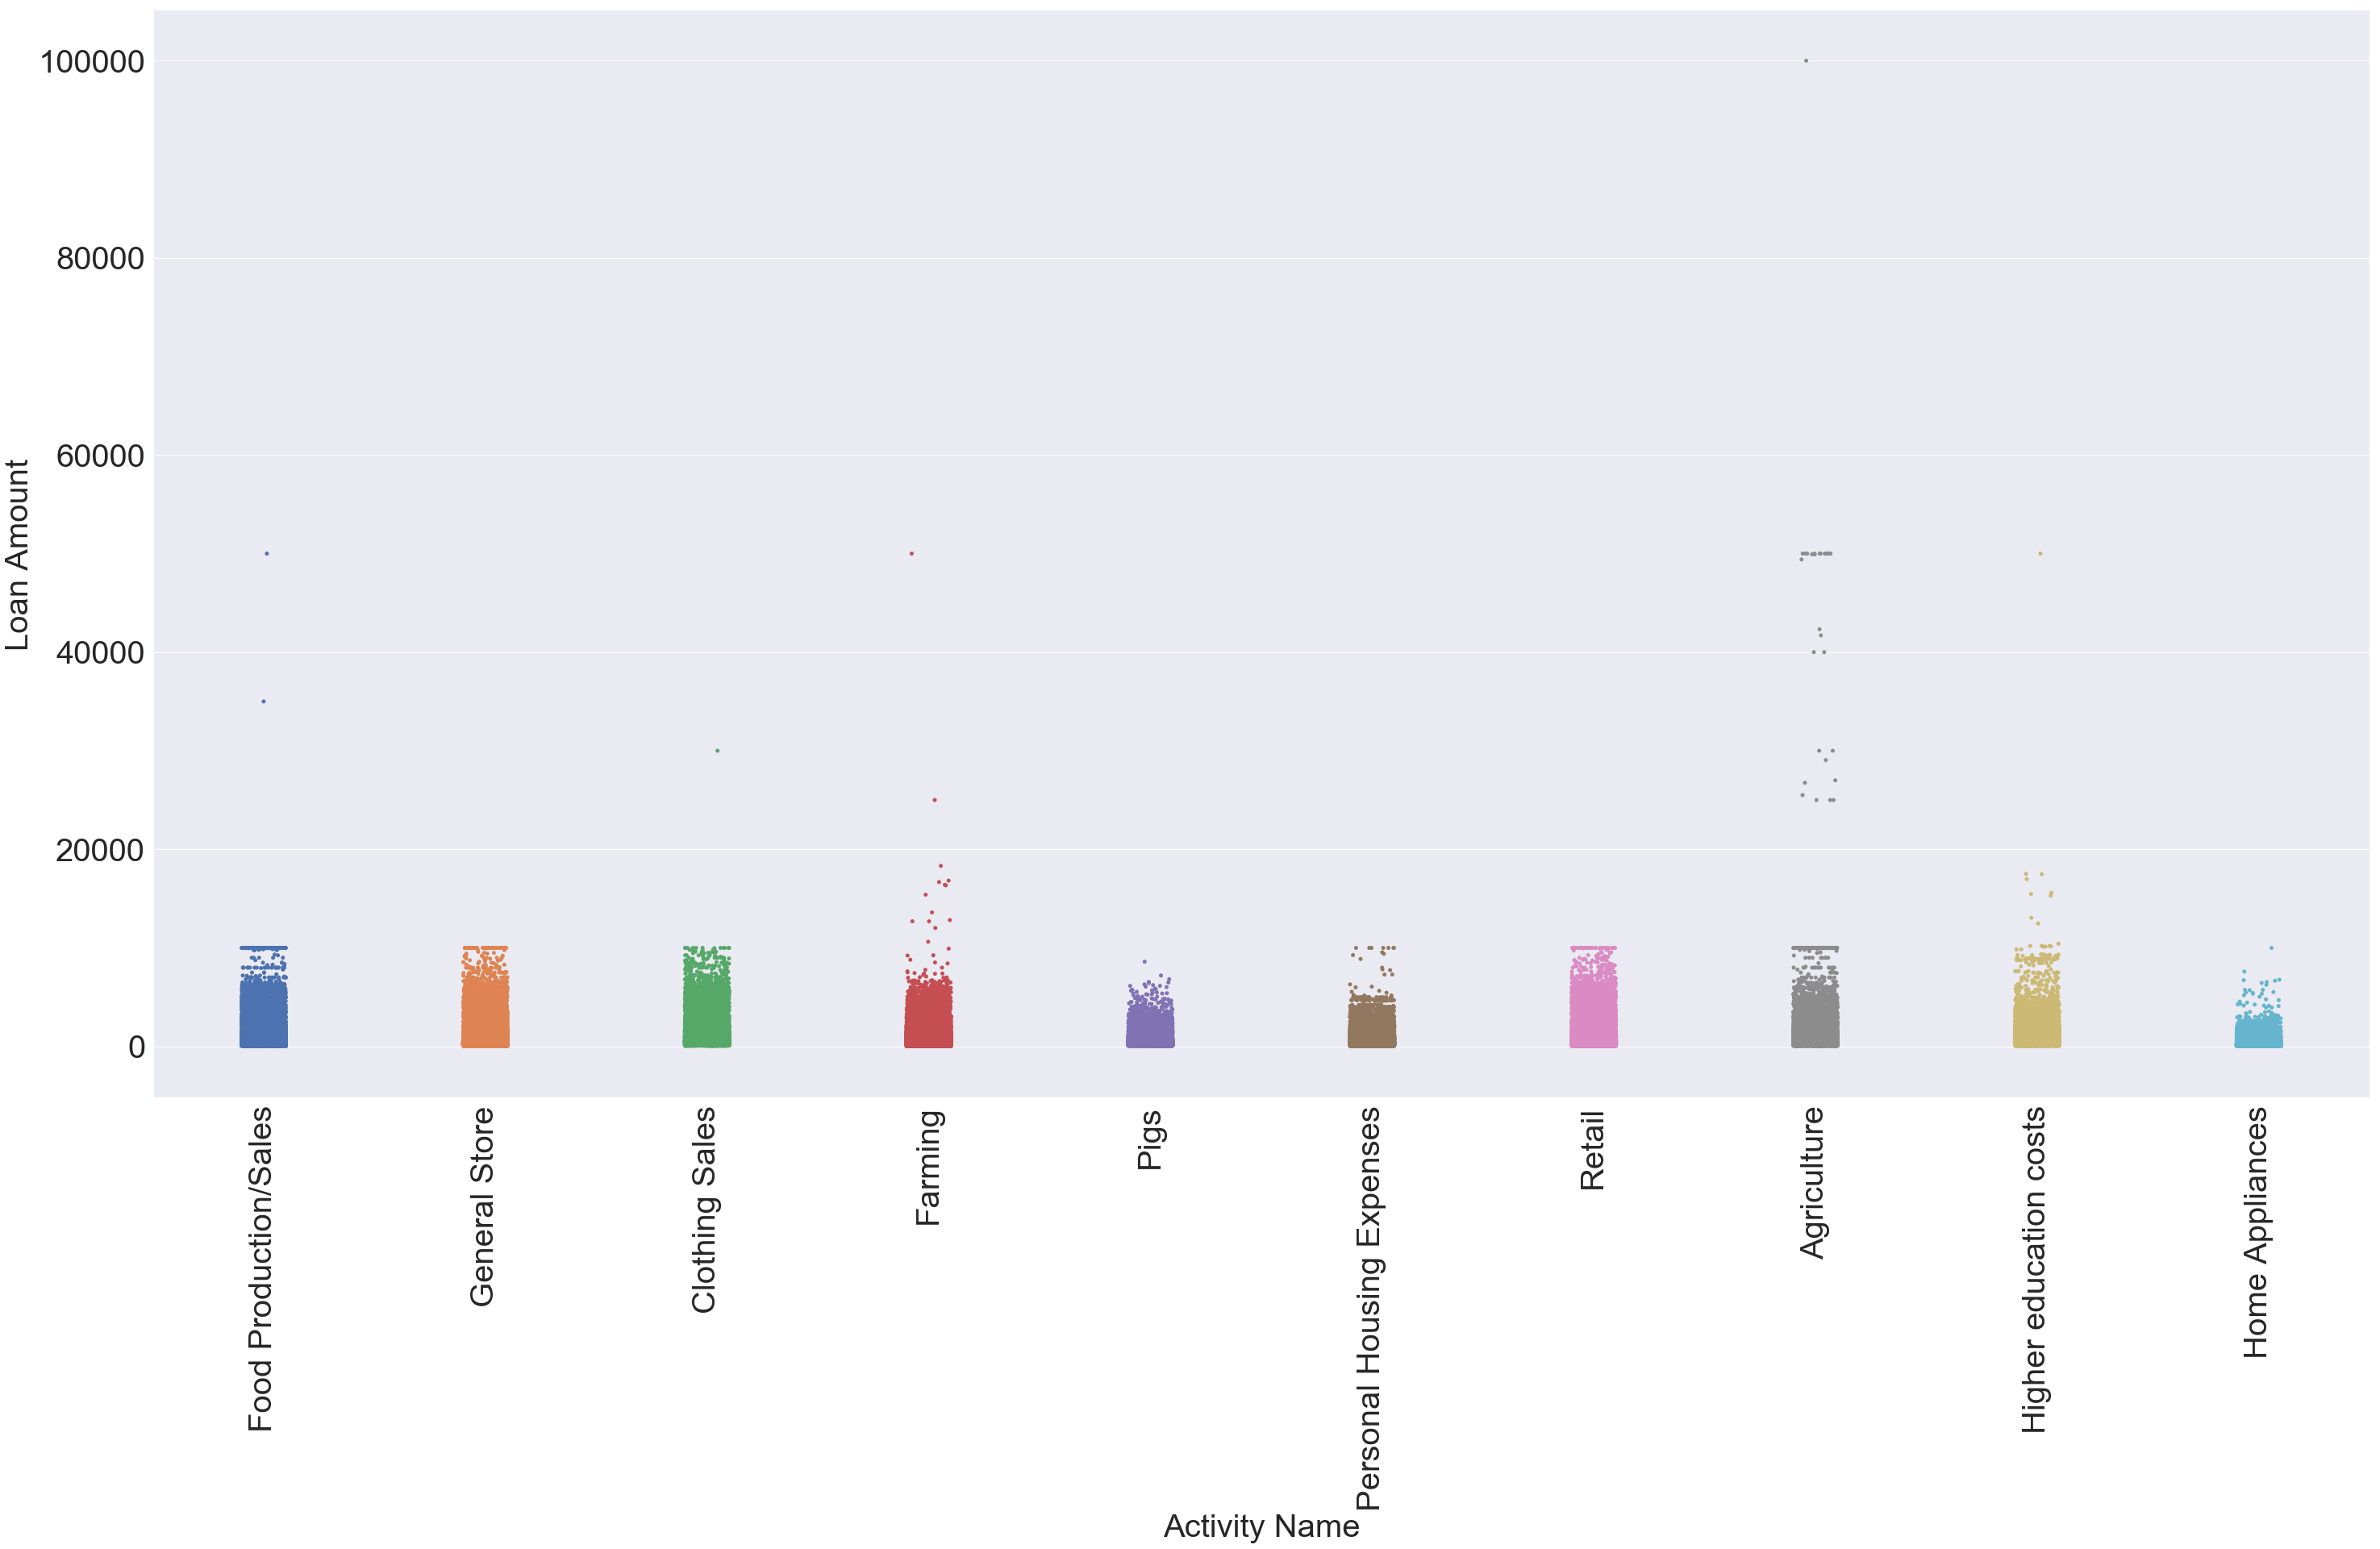

In [34]:
g = sns.catplot(x='activity', y='loan_amount', data=popular_activities, height=20, aspect=2)
g.set_xticklabels(rotation=90, fontsize="40")
g.set_yticklabels(fontsize="40")
g.set_xlabels("Activity Name", fontsize="40")
g.set_ylabels("Loan Amount", fontsize="40")

In [37]:
loans.count()

id                    671205
funded_amount         671205
loan_amount           671205
activity              671205
sector                671205
use                   666973
country_code          671197
country               671205
region                614405
currency              671205
partner_id            657698
posted_time           671205
disbursed_time        668809
funded_time           622874
term_in_months        671205
lender_count          671205
tags                  499789
borrower_genders      666984
repayment_interval    671205
date                  671205
dtype: int64

Text(0, 0.5, '')

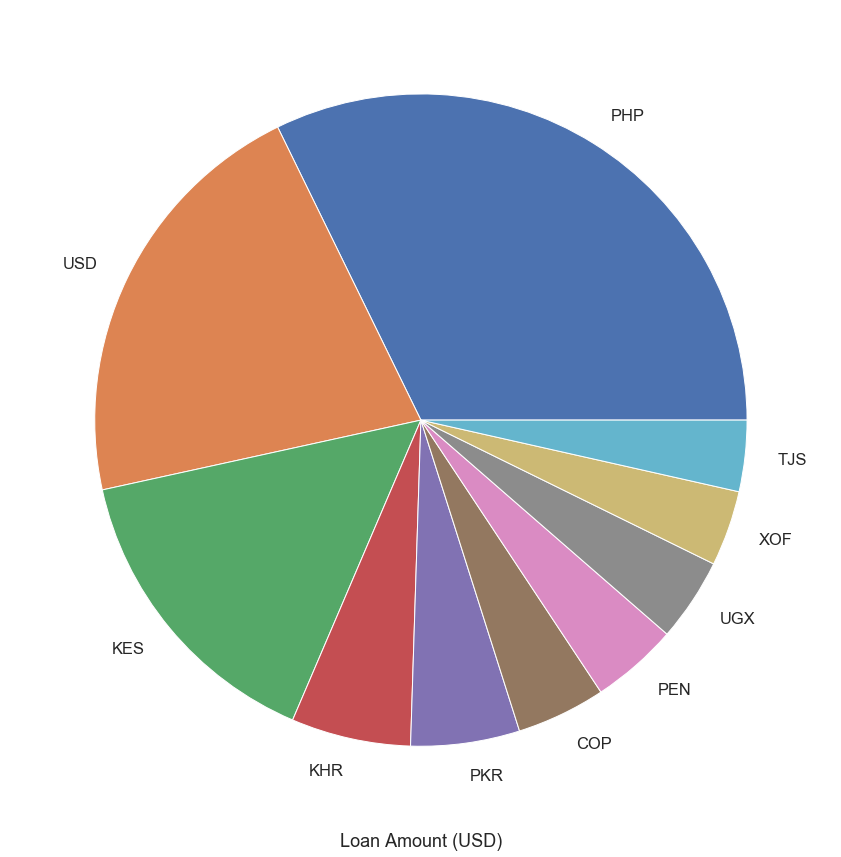

In [60]:
plt.figure(figsize=(15, 15))
g = loans.loan_amount.groupby(loans.currency).count().sort_values(ascending=False)[:10].plot(kind='pie')
g.set_xlabel("Loan Amount (USD)")
g.set_ylabel("")


In [99]:
loans.use = loans.use.apply(str).str.lower()
loans['tokens'] = loans.use.apply(nltk.word_tokenize)

In [109]:
loans['tagged_tokens'] = loans['tokens'].apply(nltk.pos_tag)

In [138]:
loans.tagged_tokens[:50]

0     [(to, TO), (buy, VB), (seasonal, JJ), (,, ,), ...
1     [(to, TO), (repair, VB), (and, CC), (maintain,...
2     [(to, TO), (repair, VB), (their, PRP$), (old, ...
3     [(to, TO), (purchase, VB), (an, DT), (embroide...
4     [(to, TO), (purchase, VB), (one, CD), (buffalo...
5     [(purchase, NN), (leather, NN), (for, IN), (my...
6     [(to, TO), (purchase, VB), (a, DT), (dairy, NN...
7     [(to, TO), (buy, VB), (more, JJR), (hair, NN),...
8     [(to, TO), (purchase, VB), (leather, NN), (,, ...
9     [(to, TO), (buy, VB), (a, DT), (stall, NN), (,...
10    [(to, TO), (cover, VB), (the, DT), (cost, NN),...
11    [(to, TO), (purchase, VB), (biscuits, NNS), (,...
12    [(to, TO), (buy, VB), (stock, NN), (of, IN), (...
13    [(to, TO), (purchase, VB), (variety, NN), (of,...
14    [(to, TO), (expand, VB), (her, PRP$), (existin...
15    [(to, TO), (buy, VB), (a, DT), (three-wheeled,...
16    [(to, TO), (buy, VB), (packs, NNS), (of, IN), ...
17    [(to, TO), (buy, VB), (a, DT), (sewing, NN

In [139]:
pattern = """
    NP: {<JJ|DT|JJR|PRP$>*<NN|NNS>+}
    INF: {<TO><VB>}
    OBJ: {<INF><NP>}
"""

cp = nltk.RegexpParser(pattern)

def get_verb(tokens):
    result = cp.parse(tokens)
    for stree in result.subtrees():
        if stree.label() == 'INF':
            infinitive = ' '.join([tok[0] for tok in stree.flatten()])
            return infinitive

In [141]:
def get_objects(tokens):
    result = cp.parse(tokens)
    for stree in result.subtrees():
        if stree.label() == 'OBJ':
            obj = ' '.join([tok[0] for tok in stree.flatten()])
            return obj

In [112]:
verb_list = Counter(list((loans.tagged_tokens.apply(get_verb).dropna()))).most_common()

In [142]:
obj = Counter(list((loans.tagged_tokens.apply(get_objects).dropna()))).most_common()

In [152]:
obj[-50:]

[('to purchase a 150-watt solar-powered system', 1),
 ('to buy an additional new auto rickshaw', 1),
 ('to purchase baby beef cattle', 1),
 ('to purchase felt', 1),
 ('to purchase grape leaves', 1),
 ('to purchase more walnuts', 1),
 ('to buy a polystyrene cooler', 1),
 ('to buy new shoe styles', 1),
 ('to add more taps', 1),
 ('to buy a large batch', 1),
 ('to buy different rices', 1),
 ('to buy jewelry supplies', 1),
 ('to buy more musical records', 1),
 ('to purchase wholesale wax', 1),
 ('to acquire menus', 1),
 ('to buy rhinestones', 1),
 ('to purchase an electronic sewing machine', 1),
 ('to provide care', 1),
 ('to restock rozeena', 1),
 ('to buy new toilet', 1),
 ('to buy an electric fence system', 1),
 ('to buy ten', 1),
 ('to install a new front door', 1),
 ('to purchase quesadillas', 1),
 ('to process palm kernel products', 1),
 ('to buy a blacksmith tool', 1),
 ('to purchase more tule reeds', 1),
 ('to buy plate', 1),
 ('to start a new crop', 1),
 ('to buy a cement mold', 1

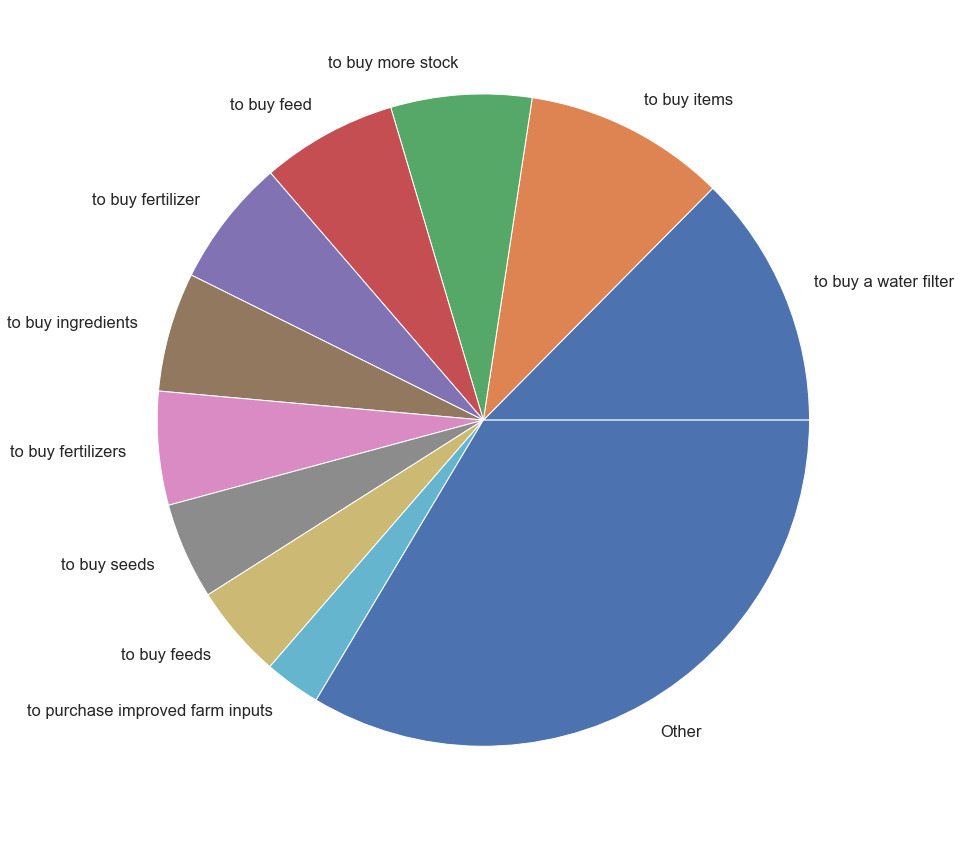

In [148]:
labels, counts = zip(*obj[:10])
labels = list(labels)
counts = list(counts)
labels.append("Other")
counts.append(42647)
plt.figure(figsize=(15, 15))

g = plt.pie(counts, labels=labels)

In [129]:
list(zip(*verb_list[-100:]))

[('to foster',
  'to land',
  'to drywall',
  'to mechanize',
  'to thrive',
  'to code',
  'to repairs',
  'to escalate',
  'to avocados',
  'to retrofit',
  'to resume',
  'to re-supply',
  'to harlem',
  'to ramp',
  'to touch',
  'to span',
  'to goto',
  'to truly',
  'to payfor',
  'to welcome',
  'to roll',
  'to invite',
  'to netflix',
  'to strategize',
  'to play',
  'to re-decorate',
  'to mitigate',
  'to start-up',
  'to admit',
  'to borrower',
  'to purcuahse',
  'to wipe',
  'to present',
  'to no/low',
  'to sola',
  'to fight',
  'to embroider',
  'to marry',
  'to locate',
  'to render',
  'to bbuy',
  'to purchase3',
  'to cotton',
  'to counter',
  'to color',
  'to dye',
  'to suppy',
  'to trade/trunk',
  'to covert',
  'to hospitalize',
  'to lead',
  'to re-register',
  'to beat',
  'to china',
  'to older',
  'to re-equip',
  'to dried',
  'to convey',
  'to herd',
  'to push',
  'to say',
  'to fullfil',
  'to purschase',
  'to eat',
  'to reside',
  'to fre

In [150]:
sum(tuple(zip(*verb_list))[1])

640381

In [151]:
sum(tuple(zip(*obj))[1])

530800

In [22]:
df = pd.read_stata("./PH_2017_DHS_02162019_1142_130164/PHIR70DT/PHIR70FL.DTA", convert_categoricals=False)

In [30]:
five = df.head()

In [42]:
df['v116'].unique()

array([12, 43, 14, 13, 11, 15, 31, 71, 41, 22, 23, 21, 97, 96, 42])

In [46]:
df['v169b'].dropna().describe()

count    20598.000000
mean         0.109962
std          0.312850
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: v169b, dtype: float64

In [ ]:
df['toilet_types'] = df['v116'].apply(lambda x: )

In [45]:
water['v169b'].dropna().describe()

count    4173.000000
mean        0.062305
std         0.241738
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: v169b, dtype: float64

(array([5.97e+03, 8.70e+01, 6.30e+01, 0.00e+00, 6.00e+00, 0.00e+00,
        0.00e+00, 5.00e+00, 9.00e+00, 4.00e+00]),
 array([  0.,  84., 168., 252., 336., 420., 504., 588., 672., 756., 840.]),
 <a list of 10 Patch objects>)

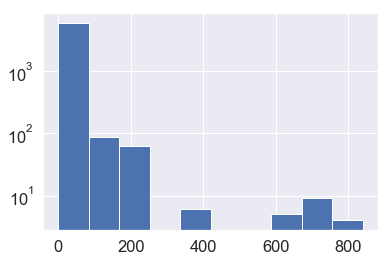

In [41]:
plt.hist(water['v115'], log=True)